# TP noté - À envoyer par mail à luc.lesoil@irisa.fr avant le 15 février 2020!

Dans votre mail, pensez à m'indiquer votre nom et votre prénom pour éviter de vous retrouver avec la note d'un autre!

Ce jeu de données est généré à la main. Il contient de (fausses) données sur le parcours professionel de plusieurs (fausses) personnes.

Description des variables:
- prenom contient le prénom de la personne considérée (un prénom est associé à une personne)
- revenus_bruts contient les revenus bruts des personnes
- mois contient le mois associé à ces revenus
- annee contient l'année associée à ces revenus
- cotisation contient vrai si la personne cotise pour sa retraite à ce moment-là

Quelques conseils:
- Les réponses (sauf la 2a) demandent toujours au moins une ligne de code
- Commentez les parties complexes
- Avant d'envoyer votre travail, pensez à redémarrer le noyau puis exécuter toutes les cellules pour éviter des étourderies de dernière minute
- Du moment que la réponse fonctionne, j'accorde les points
- Pour les figures, pensez à mettre un titre et à nommer les axes
- Le travail est personnel ;-)

### Importez toutes les libraries du notebook dans la prochaine cellule

In [42]:
import matplotlib.pyplot as plt
import matplotlib.colors as col
import numpy as np
import pandas as pd
import scipy
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import seaborn as sns

### 1) Importez le jeu de données 'data.csv', puis affichez les cinq premières lignes

In [2]:
# Import du jeu de données data.csv avec la 1ère ligne contenant le nom des variables et la virgule comme délimiteur.
data = pd.read_table(filepath_or_buffer = "./data.csv",
               header = 0,
               delimiter =',')
# Affichage des 5 premières lignes du dataset :
data.head()

,prenom,mois,annee,revenus_bruts,cotisation
0,Catherine,janvier,1979,1600,True
1,Catherine,février,1979,1600,True
2,Catherine,mars,1979,1600,True
3,Catherine,avril,1979,1600,True
4,Catherine,mai,1979,1600,True


### 2) Description des données

#### 2) a-]  La variable revenus_bruts est-elle qualitative ou quantitative?

In [3]:
# Les revenus bruts sont traduits à travers une variable de type "entier" avec l'idée de quantifier ces revenus.
# On parle donc bien ici, d'une donnée quantitative.

#### 2) b-]  Quel est le type de la variable cotisation? Affichez le en console

In [4]:
# Type de la variable "cotisation" :
print("La variable cotisation est de type : ", data['cotisation'].dtype, "\n")
# Alternative :
print("Le dataframe contient les types suivants :\n\n",data.dtypes)

La variable cotisation est de type :  bool 

Le dataframe contient les types suivants :

 prenom           object
mois             object
annee             int64
revenus_bruts     int64
cotisation         bool
dtype: object


#### 2) c-]  Affichez les dimensions du dataframe

In [5]:
# Dimension du dataframe au format (nombre_lignes, nombre_colonnes)
print("Le dataframe a pour dimension : ", data.shape)

Le dataframe a pour dimension :  (1968, 5)


#### 2) d-]  Combien de prénoms différents contient le dataset?

In [6]:
# Nombre de prénoms différents dans le dataset :
# Le mean n'apporte pas grand chose en l'état. L'important étant de pouvoir récupérer au final les dimensions du
# dataframe et donc son nombre de lignes différentes, à savoir 4 ici.
prenoms = data.groupby(['prenom']).mean().shape
print(prenoms)

(4, 3)


### 3) Extraction des données et statistiques descriptives

#### 3) a-]  Quelle période couvre le dataset?

In [7]:
# De manière simpliste ici, la recherche consiste à extraire l'année de valeur la plus faible et 
# l'année de valeur la plus élevée pour une personne en particulier, en supposant que les autres personnes ont
# des données sur la même période.
periode_patrick = data[data.prenom == "Patrick"]
# print(periode_patrick)
min_periode_patrick = periode_patrick["annee"].min()
max_periode_patrick = periode_patrick["annee"].max()
print(f"La période des mesures concernant Patrick, débute en {min_periode_patrick} et se termine en {max_periode_patrick}.")

La période des mesures concernant Patrick, débute en 1979 et se termine en 2019.


#### 3) b-]  Quelle est la moyenne des revenus bruts?

In [8]:
# Moyenne des revenus bruts toutes personnes confondues, avec arrondi au centième :
moyenne_revenus_bruts = data["revenus_bruts"].mean()
print(f"La moyenne des revenus bruts est de {np.round(moyenne_revenus_bruts, 2)} euros")

La moyenne des revenus bruts est de 2162.74 euros


#### 3) c-]  Quels ont été les revenus bruts de Patrick en janvier 1979?

In [9]:
revenus_bruts_patrick_janvier_1979 = data.query('prenom=="Patrick" & mois=="janvier" & annee==1979')["revenus_bruts"].values[0]
print(f"Les revenus bruts de Patrick en janvier 1979 s'élèvent à {revenus_bruts_patrick_janvier_1979} euros.")

Les revenus bruts de Patrick en janvier 1979 s'élèvent à 1700 euros.


#### 3) d-]  Quel montant brut a touché Catherine sur toute l'année 1983?

In [10]:
revenu_brut_total_catherine_1983 = data.query('prenom=="Catherine" & annee==1983')["revenus_bruts"].sum()
print(f"Sur l'année 1983, Catherine a gagné {revenu_brut_total_catherine_1983} euros.")

Sur l'année 1983, Catherine a gagné 19392 euros.


### 4) Transformation des données

#### 4) a-] Créez un dataset contenant les revenus bruts annuels moyens de Patrick. 

In [11]:
revenus_bruts_moyens_patrick = data\
    .query('prenom=="Patrick"')\
    .groupby(['annee'])['revenus_bruts']\
    .mean()
print("Les revenus bruts moyens de Patrick sont :\n", revenus_bruts_moyens_patrick)

Les revenus bruts moyens de Patrick sont :
 annee
1979    1700
1980    1734
1981    1768
1982    1804
1983    1804
1984    1840
1985    1840
1986    1858
1987    1914
1988    1971
1989    2011
1990    2051
1991    2092
1992    2113
1993    2134
1994    2198
1995    2220
1996    2242
1997    2242
1998    2242
1999    2265
2000    2310
2001    2356
2002    2403
2003    2451
2004    2500
2005    2575
2006    2653
2007    2706
2008    2706
2009    2733
2010    2760
2011    2760
2012    2788
2013    2788
2014    2871
2015    2958
2016    2987
2017    2987
2018    3017
2019    3047
Name: revenus_bruts, dtype: int64


#### 4) b-] Créez une variable revenus_nets à l'aide de la variable revenus_bruts. 

Pour grossièrement passer d'un salaire brut à un salaire net, il faut retrancher 23% du salaire brut pour un employé du privé et 15% pour un employé de la fonction publique.

Patrick est employé de la fonction publique, les autres sont employés dans le privé.

In [12]:
# Définition d'une fonction qui calcule les revenus nets (arrondis au centième) à partir des revenus bruts
# en fonction de l'employeur :
def calcul_revenus_nets(liste):
    mask = liste.prenom=="Patrick"
    v1 = np.round(liste["revenus_bruts"]*0.85, 2)
    v2 = np.round(liste["revenus_bruts"]*0.77, 2)
    liste['revenus_nets'] = np.where(mask, v1, v2)
    return liste
# Affichage du dataframe enrichi des salaires nets :
print(calcul_revenus_nets(data))

         prenom       mois  annee  revenus_bruts  cotisation  revenus_nets
0     Catherine    janvier   1979           1600        True       1232.00
1     Catherine    février   1979           1600        True       1232.00
2     Catherine       mars   1979           1600        True       1232.00
3     Catherine      avril   1979           1600        True       1232.00
4     Catherine        mai   1979           1600        True       1232.00
...         ...        ...    ...            ...         ...           ...
1963    Patrick       août   2019           3047        True       2589.95
1964    Patrick  septembre   2019           3047        True       2589.95
1965    Patrick    octobre   2019           3047        True       2589.95
1966    Patrick   novembre   2019           3047        True       2589.95
1967    Patrick   décembre   2019           3047        True       2589.95

[1968 rows x 6 columns]


#### 4) c-] Créez une variable contenant la date au format 'MM/YYYY', où MM est un couple de chiffres représentant le mois et YYYY l'année associés au salaire.

In [13]:
# Définition d'une fonction qui ajoute une colonne avec la date format MM/YYYY, à une liste passée en paramètre :
def ajout_date_complete(liste):
    dict_mois = {'janvier': '01', 'février': '02', 'mars': '03', 'avril': '04', 'mai': '05', 'juin': '06', 'juillet': '07', 'août': '08', 'septembre': '09', 'octobre': '10', 'novembre': '11', 'décembre': '12'}
    liste['mois_en_chiffres'] = liste['mois'].map(lambda x : dict_mois[x])
    liste['date_complete'] = liste['mois_en_chiffres'] + "/"+ liste["annee"].map(str)
    liste.drop(['mois_en_chiffres'], axis='columns', inplace=True)
    return liste
# Affichage du dataframe enrichi des dates au format XX/YYYY :
print(ajout_date_complete(data))

         prenom       mois  annee  revenus_bruts  cotisation  revenus_nets  \
0     Catherine    janvier   1979           1600        True       1232.00   
1     Catherine    février   1979           1600        True       1232.00   
2     Catherine       mars   1979           1600        True       1232.00   
3     Catherine      avril   1979           1600        True       1232.00   
4     Catherine        mai   1979           1600        True       1232.00   
...         ...        ...    ...            ...         ...           ...   
1963    Patrick       août   2019           3047        True       2589.95   
1964    Patrick  septembre   2019           3047        True       2589.95   
1965    Patrick    octobre   2019           3047        True       2589.95   
1966    Patrick   novembre   2019           3047        True       2589.95   
1967    Patrick   décembre   2019           3047        True       2589.95   

     date_complete  
0          01/1979  
1          02/1979  


### 5) Visualisation graphique

#### 5) a-] Affichez un nuage de points représentant l'évolution du revenu net des différentes personnes du dataset au fil du temps.

Si possible:
- Affichez seulement les dates de janvier en abcisses, tous les cinq ans
- Ajoutez une légende

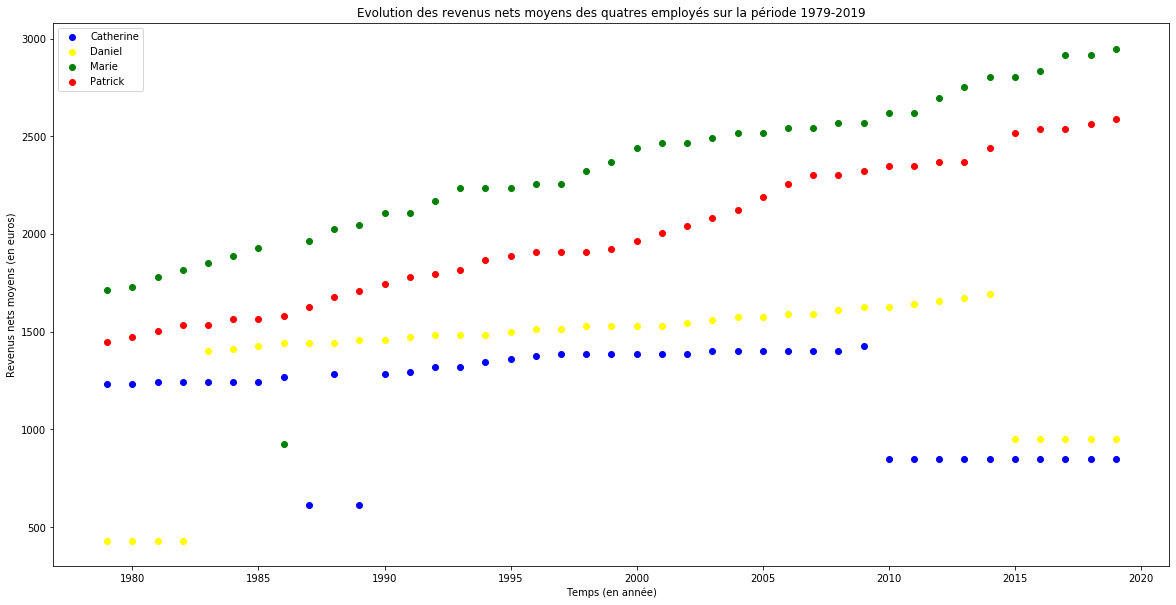

In [14]:
### Préparation des données à traiter

# Données pour l'axe des ordonnées
revenus_nets_moyens_catherine = data.query('prenom=="Catherine"').groupby(['annee'])['revenus_nets'].mean()
revenus_nets_moyens_marie = data.query('prenom=="Marie"').groupby(['annee'])['revenus_nets'].mean()
revenus_nets_moyens_daniel = data.query('prenom=="Daniel"').groupby(['annee'])['revenus_nets'].mean()
revenus_nets_moyens_patrick = data.query('prenom=="Patrick"').groupby(['annee'])['revenus_nets'].mean()

# Données pour l'axe des abscisses
tableau_date_bis = data["annee"].unique()

# Préparation et affichage du graphique
fig = plt.figure(figsize=(20, 10))
plt.scatter(tableau_date_bis, revenus_nets_moyens_catherine, c = 'blue', label="Catherine")
plt.scatter(tableau_date_bis, revenus_nets_moyens_daniel, c = 'yellow', label="Daniel")
plt.scatter(tableau_date_bis, revenus_nets_moyens_marie, c = 'green', label="Marie")
plt.scatter(tableau_date_bis, revenus_nets_moyens_patrick, c = 'red', label="Patrick")
plt.title("Evolution des revenus nets moyens des quatres employés sur la période 1979-2019")
plt.ylabel("Revenus nets moyens (en euros)")
plt.xlabel("Temps (en année)")
plt.legend()
plt.show()

#### 5) b-] Affichez un boxplot comparant les distributions de salaires nets des différentes personnes du dataset. Comparez les variations de salaires (écart-type) par personne. Quelle personne a les revenus les plus fluctuants d'après le graphique? Quelle personne a les revenus les plus fluctuants en écart-type? Comment expliquez-vous cette différence?

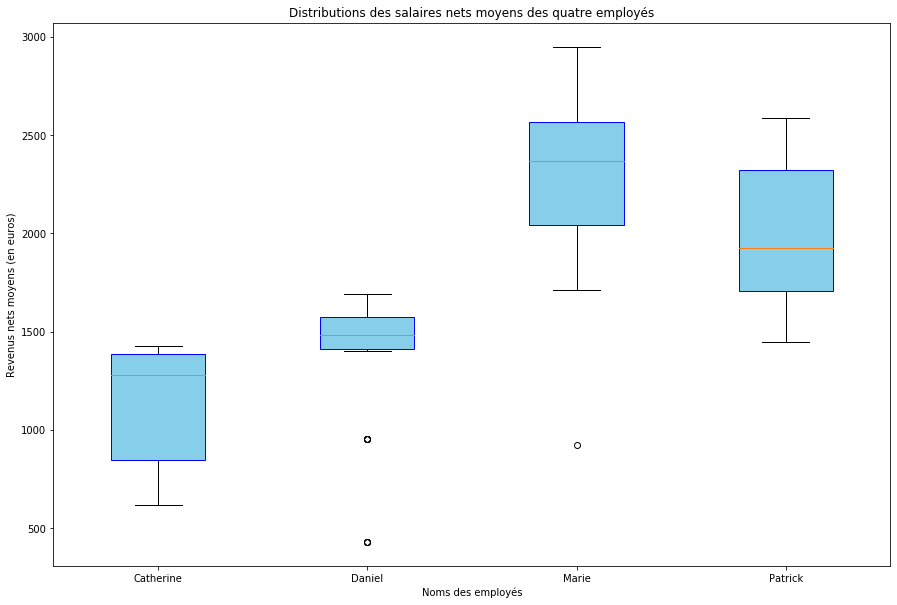

Ecart-type sur les revenus nets moyens de Catherine = 249.59411300953883
Ecart-type sur les revenus nets moyens de Daniel = 363.7219735039899
Ecart-type sur les revenus nets moyens de Marie = 411.3430149846725
Ecart-type sur les revenus nets moyens de Patrick = 350.50813383259435


In [17]:
# Préparation et affichage du boxplot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.set_xticklabels(['Catherine','Daniel', 'Marie', 'Patrick'])
plt.title('Distributions des salaires nets moyens des quatre employés')
plt.ylabel("Revenus nets moyens (en euros)")
plt.xlabel("Noms des employés")
bp = plt.boxplot((revenus_nets_moyens_catherine, revenus_nets_moyens_daniel,\
             revenus_nets_moyens_marie, revenus_nets_moyens_patrick), patch_artist = True)

for patch in bp['boxes']:
  patch.set_color('skyblue')
  patch.set_edgecolor('blue')

plt.show()

# Calcul des écart-types des quatre employés
std_catherine = np.std(revenus_nets_moyens_catherine)
std_daniel = np.std(revenus_nets_moyens_daniel)
std_marie = np.std(revenus_nets_moyens_marie)
std_patrick = np.std(revenus_nets_moyens_patrick)

print(f"Ecart-type sur les revenus nets moyens de Catherine = {std_catherine}")
print(f"Ecart-type sur les revenus nets moyens de Daniel = {std_daniel}")
print(f"Ecart-type sur les revenus nets moyens de Marie = {std_marie}")
print(f"Ecart-type sur les revenus nets moyens de Patrick = {std_patrick}")

In [18]:
# D'après les résultats, c'est Marie qui a la plus grande variation de revenus. Ce résultat est cohérent avec
# l'affichage graphique en BoxPlot.

Il faut filtrer les valeurs aberrantes pour pouvoir comparer les deux distributions.

### 6) Méthodes statistiques


Pour cette question, utilisez les données de la question 4a!

#### 6) a-] Modéliser l'évolution du salaire de Patrick au cours du temps à l'aide d'une régression. 

Le coefficient directeur de la droite de régression vaut 34.69651567944251
La constante de régression vaut -67007.13972125435


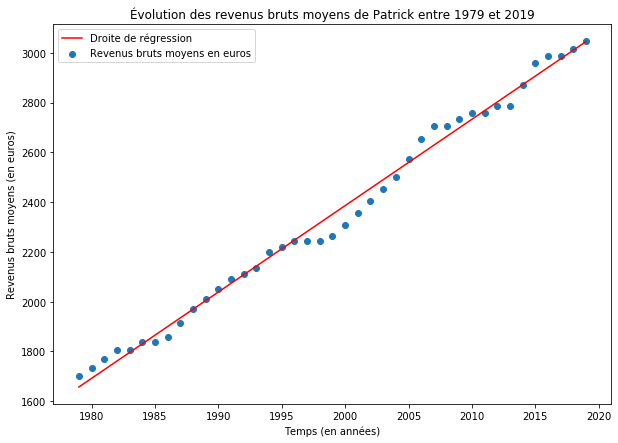

In [16]:
# Préparation de la droite de régression :
t = np.array(revenus_bruts_moyens_patrick).reshape(-1,1)
reg = LinearRegression()
annee = np.arange(1979, 2020, 1)
reg.fit(np.array(annee).reshape(-1,1), t)
droite_reg = np.array(reg.coef_*annee+reg.intercept_).reshape(-1,1)
print(f"Le coefficient directeur de la droite de régression vaut {reg.coef_[0][0]}")
print(f"La constante de régression vaut {reg.intercept_[0]}")

# Préparation et affichage du graphique :
plt.figure(figsize=(10,7))
plt.scatter(annee, revenus_bruts_moyens_patrick, label="Revenus bruts moyens en euros")
plt.title('Évolution des revenus bruts moyens de Patrick entre 1979 et 2019')
plt.xlabel('Temps (en années)')
plt.ylabel("Revenus bruts moyens (en euros)")
plt.plot(annee, droite_reg, c="red", label = 'Droite de régression')
plt.legend()
plt.show()

#### 6) b-] Pouvez-vous prédire ce que gagnera Patrick (en brut) s'il est toujours dans la fonction publique dans 10 ans? 

In [20]:
# Prévisions de revenus bruts moyens (arrondis au centième) de Patrick pour l'année 2030 : 
revenus_bruts_moyens_patrick_2030 = reg.coef_*2030+reg.intercept_
print(f"En 2030, Patrick gagnera (potentiellement) chaque mois, un revenu brut moyen de {np.round(revenus_bruts_moyens_patrick_2030, 2)[0][0]} euros.")

En 2030, Patrick gagnera (potentiellement) chaque mois, un revenu brut moyen de 3426.79 euros.


#### 6) c-] Quelle est la valeur de son augmentation annuelle? 

In [ ]:
# La droite de régression affichée dans la réponse de la question 6a se lit comme une variation du revenu brut
# moyen de Patrick.
# Le coefficient directeur de cette droite permet donc d'évaluer l'augmentation de revenu brut moyen de Patrick
# chaque année. Ainsi, Patrick a gagné, en moyenne chaque année 416.40 euros bruts en plus (34.70 euros * 12 mois).

#### 6) d-] Affichez le R² associé à la régression; le modèle vous parait-il correct? Affichez la droite de régression pour vérifier!

In [53]:
# Récupération des données utiles au calcul du R²
X = np.array(revenus_bruts_moyens_patrick.index)
y = np.array(revenus_bruts_moyens_patrick.values)

# Calcul intermédiaire afin de récupérer la r_value (coefficient de corrélation)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(X,y)

# Finalement, calcul du R²
print(f"Le R² (coefficient de détermination) associé à la régression dans le cas de Patrick vaut : {r_value**2}" )

Le R² (coefficient de détermination) associé à la régression dans le cas de Patrick vaut : 0.9911546294140744


### 7) Graphe dynamique
    
Patrick aimerait avoir un aperçu dynamique de ses augmentations cours du temps. 

Créez un graphe dynamique qui affiche chacune des moyennes de salaires bruts au fur et à mesure du temps. 

Le titre du graphe comportera l'année en cours, et l'augmentation par rapport à l'an passé en pourcentage.

### 8) Optimisation


#### Contexte:

Vous êtes le gestionnaire du budget d'une caisse de retraite complémentaire, comprenant quatre anciens actifs; Catherine, Daniel, Marie et Patrick. Vous décidez d'établir un régime de retraite à points (chaque euro cotisé donne droit à un point).

Mais le budget accordé à la caisse de retraite baisse chaque année, alors que chaque personne doit toujours toucher le même nombre de points! 

On vous impose donc de baisser la valeur du point d'une proportion constante $\beta$ chaque année pour répartir l'argent de manière équilibrée entre les différentes personnes.

#### Formalisation:

Dans t années (t= 0 pour 2019, t=1 pour 2020, ..., t=5 pour 2024), la valeur du point P(t) suivra la loi suivante : 

$P(t) = P_{0}*(1-\beta)^{t}$

avec:

- $P_{0}$ la valeur du point pour l'année 2019
- $\beta$ la proportion de baisse de valeur du point, constante sur les cinq années





Le budget alloué à la personne i suit la formule suivante:

$B_{i}(t) = P(t)*r_{i}$

avec:

- $P_{t}$ la valeur du point pour l'année t
- $r_{i}$ le nombre de points moyen cotisés par la personne i




Le budget total est réparti entre les différentes personnes:

$B(t) = \sum_{i=1}^{4} B_{i}(t)$

avec:

- $B_{i}(t)$ Le budget alloué à la personne i à l'année t

#### Alors on vous demande de trouver $P_{0}^{opt}$ la valeur du point optimale pour l'année 2019, et $\beta^{opt}$ la proportion de baisse de valeur du point optimale de telle sorte que toutes les personnes recoivent leur nombre de points sur les cinq prochaines années  (de 2020 à 2024) tout en respectant le budget prévu $\hat{B}$.

Autrement dit, on vous demande de trouver $P_{0}^{opt}$ et $\beta^{opt}$ tels que:

$P_{0}^{opt}, \beta^{opt} = argmin_{(P_{0}, \beta)} \sum_{t=1}^{5}| B(t)-\hat{B}(t)|$

Le tableau des budgets prévus $\hat{B}(t)$ pour les cinq prochaines années est donné par le tableau budget ci-dessous.

Pour simplifier l'exercice, on a supposé que l'on pouvait légèrement dépasser le budget chaque année (autrement dit, on veut juste approcher trouver une valeur de B proche de $\hat{B}$, sans forcément que B soit strictement inférieur à $\hat{B}$ tous les ans).

#### Étapes de résolution proposées:
- Calculez le nombre de points moyens $r_{i}$ gagnés par chaque personne grâce aux variables revenus_bruts et cotisation. $r_{i}$, c'est donc la moyenne des revenus bruts qui ont été côtisés chaque mois pendant 40 ans par la personne i.
- Définissez une fonction P qui prend en entrée $P_{0}$, $\beta$ et t, et qui renvoie la valeur de $P(t)$
- Créez une fonction B qui prend en entrée i, $P_{0}$, $\beta$ et t vous renvoie $B(t)$ grâce à P et $r_{i}$. $B(t)$, c'est juste la somme du tableau des budgets individuels $B_{i}(t)$
- Grâce à B et $\hat{B}$, définissez la fonction de coût en fonction de $P_{0}$ et $\beta$
- Minimisez la fonction de coût pour trouver $P_{0}$ et $\beta$ avec scipy. On pourra essayer $P_{0}^{ini} = 0.7$ et $\beta^{ini} = 0.02$
- Commentez les valeurs de $P_{0}^{opt}$ et $\beta^{opt}$, et tracez le graphe avec B et $\hat{B}$ en fonction de t. La solution vous paraît-elle réaliste?

Vous pouvez vous servir de graphes/schémas pour mieux appréhender le problème. 

N'hésitez pas à laisser vos essais/débuts de résolution dans le notebook, même s'ils sont incomplets! :)

In [ ]:
annee = [2020,2021,2022,2023,2024]
budget = [4500, 4200, 3800, 3500, 3200]